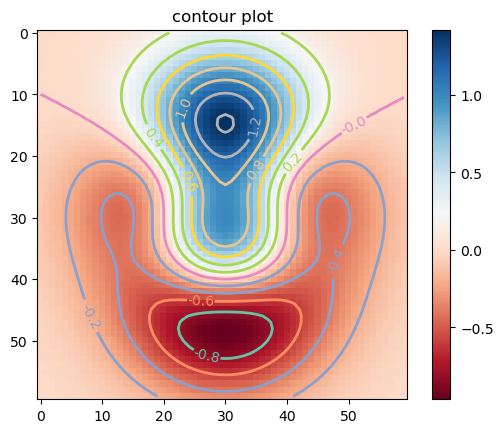

In [1]:
## Contour plot examples, code adapted from: https://glowingpython.blogspot.com/2012/01/how-to-plot-two-variable-functions-with.html
# 2-D contour

from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,title
import matplotlib.pyplot as plt


# generating synthetic data
# the function that we'll plot
def z_func(x,y):

     return (1-(x**2+y**3))*exp(-(x**2+y**2)/2)

x = arange(-3.0,3.0,0.1)
y = arange(-3.0,3.0,0.1)
X,Y = meshgrid(x, y) # grid of point
Z = z_func(X, Y) # evaluation of the function on the grid

## generating a contour plot
im = imshow(Z,cmap=cm.RdBu) # drawing the function

# adding the contour lines with labels
cset = contour(Z,arange(-1,1.5,0.2),linewidths=2,cmap=cm.Set2)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
colorbar(im) # adding the colobar on the right


# formatting the graph
title('contour plot')
plt.savefig('two_dimensional_plot.png',dpi = 1000)
plt.show()

<ipython-input-2-7a96e91f37e1>:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax1 = fig.gca(projection='3d')


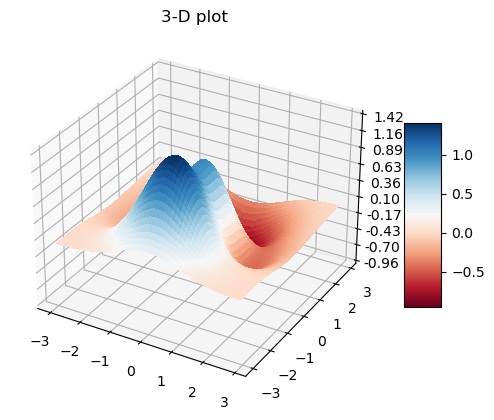

In [2]:
# 3-D contour example

from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

# generating and formattinG a graph in 3-D
fig = plt.figure()
ax1 = fig.gca(projection='3d')
surf = ax1.plot_surface(X, Y, Z, rstride=1, cstride=1,
                       cmap=cm.RdBu,linewidth=0, antialiased=False)

ax1.zaxis.set_major_locator(LinearLocator(10))
ax1.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
title('3-D plot')
plt.savefig('three_dimensional_plot.png',dpi = 1000)
plt.show()

In [3]:
## Contour Plots and Word Embedding Visualisation
# Data and pre-processing
import pandas as pd

In [4]:
data = pd.read_csv('IMDB_dataset.csv', encoding='utf8')
data = pd.DataFrame(data['review'])

In [5]:
import re
from nltk.corpus import stopwords
stop = set(stopwords.words("english"))

C:\Users\Petr\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
# cleaning functions definition
def preprocess(text):
    text_input = re.sub('[^a-zA-Z1-9]+', ' ', str(text))
    output = re.sub(r'\d+', '',text_input)
    return output.lower().strip()

def remove_stopwords(text):
    filtered_words = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(filtered_words)

In [7]:
# performing cleaning operations
data['review'] = data.review.map(preprocess)
data['review'] = data.review.map(remove_stopwords)

In [9]:
# building teh corpus
def build_corpus(data):
    corpus = []
    for sentence in data.iteritems():
        word_list = sentence[1].split(" ")
        corpus.append(word_list)
    return corpus

corpus = build_corpus(data['review'])

In [11]:
# Word2vec model training
from gensim.models import Word2Vec
model = Word2Vec(corpus, vector_size=200, min_count=10)

In [12]:
# Dimensionality reduction with PCA
from sklearn.decomposition import PCA

# fit a 3-D PCA model to the vectors
words = model.wv.key_to_index
vectors = model.wv.get_normed_vectors()
pca = PCA(n_components=3)
PCA_result = pca.fit_transform(vectors)

# prepare a dataframe
words_df = pd.DataFrame.from_dict(words, orient='index')
words_df.reset_index(inplace=True)
words_df = words_df.iloc[:,0]
words_df = pd.DataFrame(words_df)
words_df.rename({'index': 'word'}, axis=1, inplace=True)

PCA_result = pd.DataFrame(PCA_result)
PCA_result['x'] = PCA_result.iloc[0:, 0]
PCA_result['y'] = PCA_result.iloc[0:, 1]
PCA_result['z'] = PCA_result.iloc[0:, 2]

PCA_final = pd.merge(words_df, PCA_result, left_index = True, right_index=True)
PCA_final = PCA_final[['word','x','y','z']]

PCA_final = PCA_final.head(60)
PCA_final

,word,x,y,z
0,br,0.579243,0.271599,0.430986
1,movie,0.774596,0.277887,0.515098
2,film,0.724131,0.361471,0.271365
3,one,0.560289,0.175698,0.463790
4,like,0.478776,0.129799,0.529319
5,good,0.550217,0.407606,0.516596
6,time,0.531859,0.104269,0.436714
7,even,0.570265,0.178445,0.438740
8,would,0.571226,0.132216,0.445643
9,story,0.579999,0.265581,0.193820


In [14]:
## Contour plot visualization
# pivoting coordinates into a matrix structure
import numpy as np

Z = PCA_final.pivot_table(index='x', columns='y', values='z').T.values
Z = np.nan_to_num(Z, copy=True, nan=0.0)

X_unique = np.sort(PCA_final.x.unique())
Y_unique = np.sort(PCA_final.y.unique())
X, Y = np.meshgrid(X_unique, Y_unique)

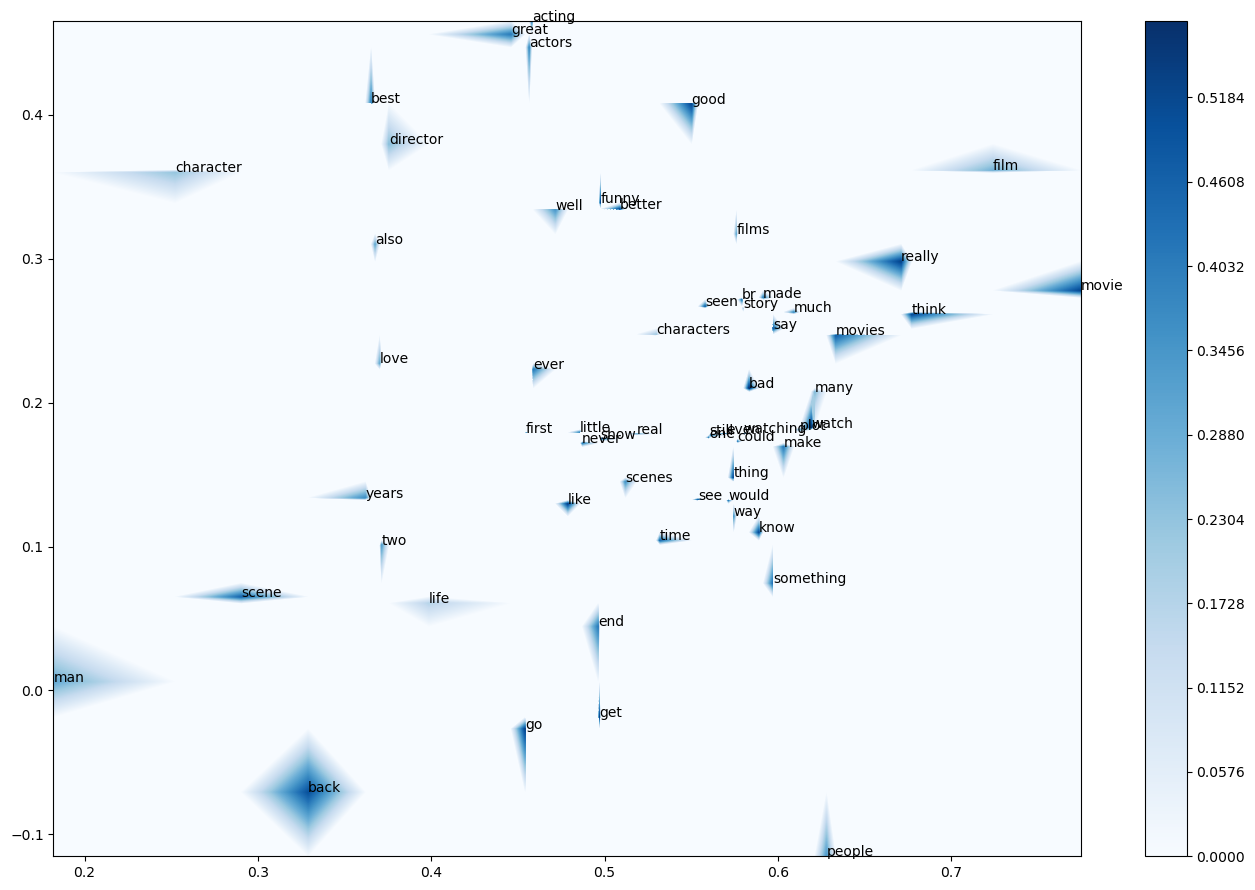

In [15]:
# generate a 2D contour plot
import matplotlib.pyplot as plt

plt.figure(figsize=(14,9))
plt.contourf(X, Y, Z, 1000, cmap='Blues')

# loop through to annotate multiple datapoints
for i in range(PCA_final.shape[0]):
    plt.annotate(PCA_final.word.tolist()[i], (PCA_final.x.tolist()[i], PCA_final.y.tolist()[i]))

plt.tight_layout()

plt.colorbar()
plt.savefig('contour_2d.png', dpi = 1000)
plt.show()

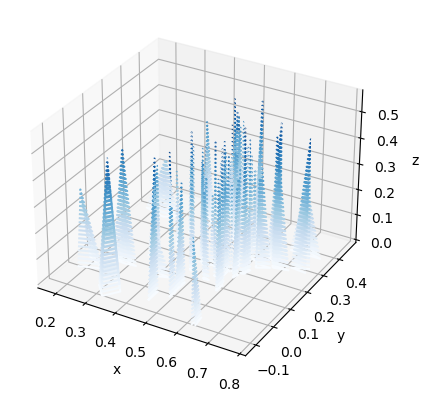

In [16]:
# generate a 3D contour plot
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='Blues')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.savefig('contour_3d.png', dpi = 1000)
plt.show()